### Bibliotecas

In [8]:
%matplotlib notebook

import numpy as np

from scipy import optimize

import matplotlib
import matplotlib.pyplot as plt

### Objetivos

$ \begin{cases} \begin{aligned}
\hfill\min\;&f_1(\theta, x)=1-\cos (\theta)+x \\
\hfill\min\;&f_2(\theta, x)=1-\sin (\theta)+x \\
\textrm{Sujeito a}\;&0 \leq \theta \leq \frac{\pi}{2}, \; 0 \leq x \leq 1 \\
\end{aligned} \end{cases} $

In [9]:
def f1(p):
    theta = p[0]
    x = p[1]
    
    return 1 - np.cos(theta) + x

def f2(p):
    theta = p[0]
    x = p[1]
    
    return 1 - np.sin(theta) + x

### Gráficos

<IPython.core.display.Javascript object>


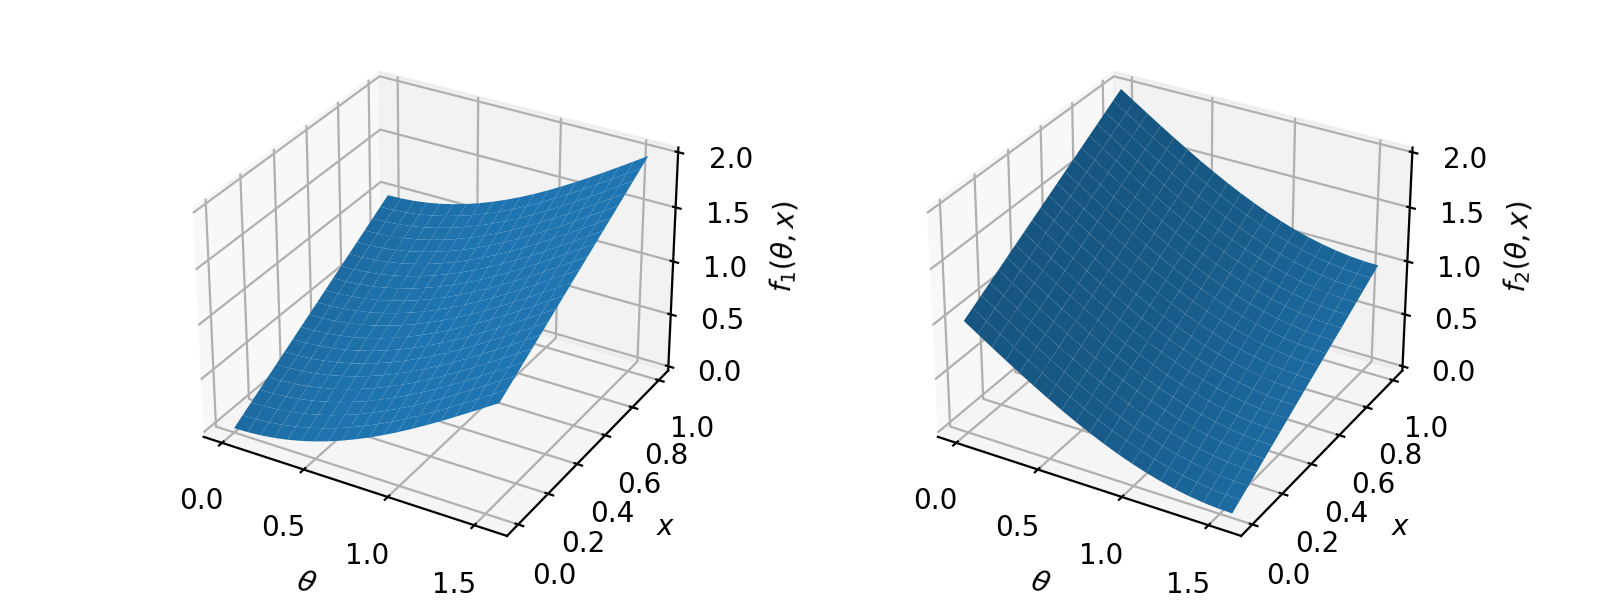

In [10]:
# Criando a figura
fig = plt.figure(figsize=(8,3))

# Definindo os limites e criando a malha
limites = [[0.0, np.pi/2.0], [0.0, 1.0]]
theta = np.linspace(limites[0][0], limites[0][1], 20)
x = np.linspace(limites[1][0], limites[1][1], 20)

X, Y = np.meshgrid(theta, x)

########## f1 ##########
# Criando o eixo
ax = fig.add_subplot(121, projection='3d')

# Calculando os valores da função
zs = np.array(f1([np.ravel(X), np.ravel(Y)]))
Z1 = zs.reshape(X.shape)

# Plotando
ax.plot_surface(X, Y, Z1);

# Nomes dos eixos
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$x$")
ax.set_zlabel(r"$f_1(\theta,x)$")

########## f2 ##########
# Criando o eixo
ax = fig.add_subplot(122, projection='3d')

# Calculando os valores da função
zs = np.array(f2([np.ravel(X), np.ravel(Y)]))
Z2 = zs.reshape(X.shape)

# Plotando
ax.plot_surface(X, Y, Z2);

# Nomes dos eixos
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$x$")
ax.set_zlabel(r"$f_2(\theta,x)$")

fig.tight_layout()

### Otimização

In [11]:
p_opt_f1 = optimize.differential_evolution(
    func=f1,
    bounds=limites,
    popsize=20,
    strategy="best1bin",
    tol=1e-12,
    recombination=0.95,
    mutation=0.6,
    maxiter=1000
)
print(p_opt_f1)

p_opt_f2 = optimize.differential_evolution(
    func=f2,
    bounds=limites,
    popsize=20,
    strategy="best1bin",
    tol=1e-12,
    recombination=0.95,
    mutation=0.6,
    maxiter=1000
)

print(p_opt_f2)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 3563
     nit: 88
 success: True
       x: array([5.35537081e-09, 0.00000000e+00])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 3883
     nit: 96
 success: True
       x: array([1.57079632, 0.        ])


### Trade-off entre objetivos

Podemos encontrar a superfície de trade-off substituindo a variável $x$ por 0. Assim, obtemos uma expressão analítica para a superfície de trade-off:

$ \begin{cases} \begin{aligned}
&f_1(\theta)=1-\cos (\theta) \\
&f_2(\theta)=1-\sin (\theta) \\
&0 \leq \theta \leq \frac{\pi}{2}
\end{aligned} \end{cases} $

<IPython.core.display.Javascript object>


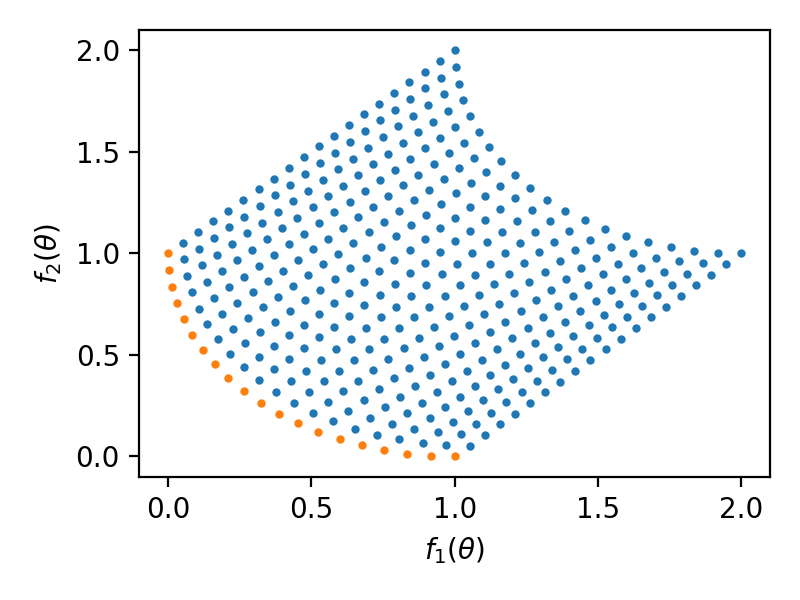

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))

m, n = np.shape(Z1)
f12 = np.zeros((m, n))

for i in range(m):
    for j in range(n):
        if i == 0: # x = 0
            ax.plot(Z1[i, j], Z2[i, j], "o", color="C1", markersize=2)
        else:
            ax.plot(Z1[i, j], Z2[i, j], "o", color="C0", markersize=2)
        
ax.set_xlabel(r"$f_1(\theta)$")
ax.set_ylabel(r"$f_2(\theta)$")

fig.tight_layout()

### Outra forma de ver o trade-off

<IPython.core.display.Javascript object>


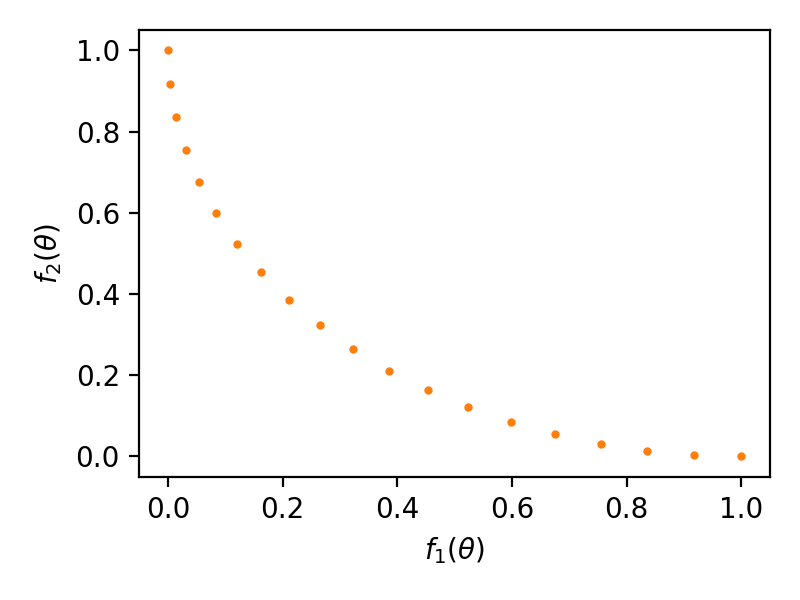

In [13]:
vf1 = np.zeros(len(theta))
vf2 = np.zeros(len(theta))

for k, t in enumerate(theta):
    vf1[k] = f1([t, 0.0])
    vf2[k] = f2([t, 0.0])

fig, ax = plt.subplots(figsize=(4, 3))

for i in range(len(theta)):
    ax.plot(vf1[i], vf2[i], "o", color="C1", markersize=2)

ax.set_xlabel(r"$f_1(\theta)$")
ax.set_ylabel(r"$f_2(\theta)$")

fig.tight_layout()